In [21]:
import sys
sys.path.append("/home/ubuntu/proj/dsa110-shell/dsa110-nsfrb/")
import nsfrb.searching as sl
from PIL import Image,ImageOps
import numpy as np
from scipy.stats import norm
import os
from matplotlib import pyplot as plt
from simulations_and_classifications import generate_source_images as gsi

In [9]:
help(generate_source_images)

Help on module simulations_and_classifications.generate_source_images in simulations_and_classifications:

NAME
    simulations_and_classifications.generate_source_images

FUNCTIONS
    generate_src_images(dataset_dir, num_observations, noise_std_low, noise_std_high, exclude_antenna_percentage, HA_low, HA_high, Dec_low, Dec_high, spectral_index_low, spectral_index_high, zoom_pix)
        This function generates images of sources observed with DSA-110 core antennas.
        It takes various parameters such as the dataset directory, the number of observations, 
        the bounds for noise standard deviation, excluded antenna percentage, HA, Dec, spectral index, and zoom level.
        It generates multiple observations with different random parameters and saves the images
        and metadata in the specified dataset directory.
        
        Parameters:
        - dataset_dir (str): Dataset directory.
        - num_observations (int): Number of generated observations.
        - noise_

In [23]:
gsi.generate_src_images(dataset_dir='/home/ubuntu/proj/dsa110-shell/dsa110-nsfrb/simulations_and_classifications/src_examples/observation_1/images/32x32_images/',
                       num_observations=1,
                       noise_std_low=1,
                       noise_std_high=2,
                       exclude_antenna_percentage=[0,0.15],
                       HA_low=0,
                       HA_high=10/180*np.pi,
                       Dec_low=-np.pi/2,
                       Dec_high=np.pi/2,
                       spectral_index_low=-2,
                       spectral_index_high=2,
                       zoom_pix=16)

Progress: 100%|███████████████████████████████| 1/1 [00:01<00:00,  1.53s/it]

All observations saved.


# function to make test images of desired dimensions using Nikita's png's

subband_avg_1428.57_MHz.png
subband_avg_1334.82_MHz.png
subband_avg_1452.01_MHz.png
subband_avg_1440.29_MHz.png
subband_avg_1323.11_MHz.png
subband_avg_1311.39_MHz.png
subband_avg_1416.86_MHz.png
subband_avg_1393.42_MHz.png
subband_avg_1346.54_MHz.png
subband_avg_1405.14_MHz.png
subband_avg_1369.98_MHz.png
subband_avg_1358.26_MHz.png
subband_avg_1475.45_MHz.png
subband_avg_1487.17_MHz.png
subband_avg_1463.73_MHz.png
subband_avg_1381.70_MHz.png


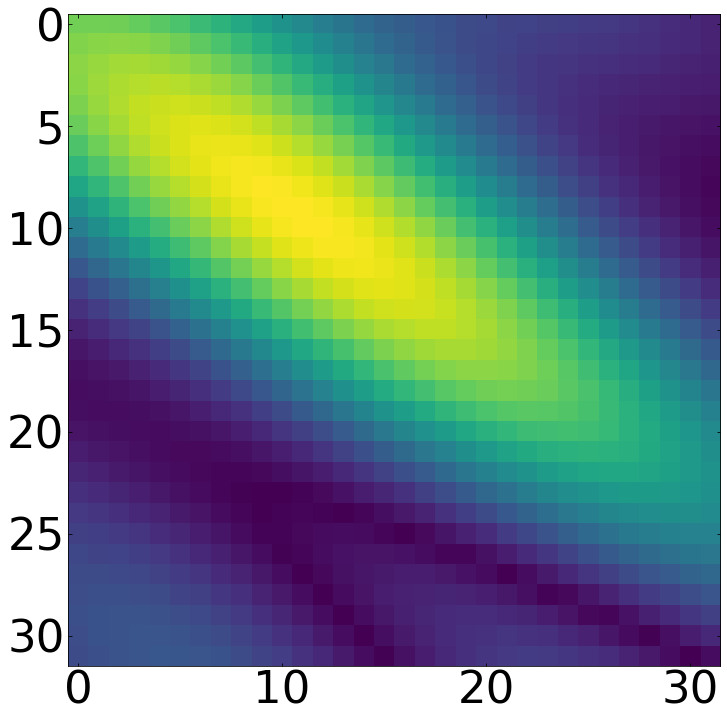

subband_avg_1428.57_MHz.png
subband_avg_1334.82_MHz.png
subband_avg_1452.01_MHz.png
subband_avg_1440.29_MHz.png
subband_avg_1323.11_MHz.png
subband_avg_1311.39_MHz.png
subband_avg_1416.86_MHz.png
subband_avg_1393.42_MHz.png
subband_avg_1346.54_MHz.png
subband_avg_1405.14_MHz.png
subband_avg_1369.98_MHz.png
subband_avg_1358.26_MHz.png
subband_avg_1475.45_MHz.png
subband_avg_1487.17_MHz.png
subband_avg_1463.73_MHz.png
subband_avg_1381.70_MHz.png
subband_avg_1428.57_MHz.png
subband_avg_1334.82_MHz.png
subband_avg_1452.01_MHz.png
subband_avg_1440.29_MHz.png
subband_avg_1323.11_MHz.png
subband_avg_1311.39_MHz.png
subband_avg_1416.86_MHz.png
subband_avg_1393.42_MHz.png
subband_avg_1346.54_MHz.png
subband_avg_1405.14_MHz.png
subband_avg_1369.98_MHz.png
subband_avg_1358.26_MHz.png
subband_avg_1475.45_MHz.png
subband_avg_1487.17_MHz.png
subband_avg_1463.73_MHz.png
subband_avg_1381.70_MHz.png
0.9999999999999999 105801000.0
0.9999999999999999 105666000.0
1.0 105352000.0
1.0 105806000.0
1.0 105347

In [193]:

def make_PSF_cube(loc=0.5,gridsize=32,nchans=16,nsamps=1000,RFI=False):
    #get pngs
    dirname = "/home/ubuntu/proj/dsa110-shell/dsa110-nsfrb/simulations_and_classifications/src_examples/observation_1/images/32x32_images/src_examples/observation_1/images/"
    pngs = os.listdir(dirname)
    sourceimg = np.zeros((gridsize,gridsize,nsamps,nchans))
    freqs = []
    fs = []
    
    for png in pngs:
        print(png)
        if ".png" in png:
            #get frequency
            freq = float(png[png.index("avg_") + 4: png.index("avg_") + 11])
            freqs.append(freq)
            fs.append(png)

    freqs_sorted = np.sort(freqs)
    fs_sorted = [x for x, _ in sorted(zip(fs, freqs))]

    for i in range(nchans):
        for j in range(nsamps):
            sourceimg[:,:,j,i] = np.asarray(ImageOps.grayscale(Image.open(dirname + fs_sorted[i])))
    return sourceimg
    import copy


def get_SNR(img,PSFimg,wid,loc,noises=np.ones(16)):

    boxcar = np.zeros(img.shape[2])
    boxcar[loc:loc+wid] = 1
    
    timeseries = np.sum(img.mean(3)*PSFimg.mean(3),axis=(0,1))
    
    timeseries = np.sum((img/np.array(noises)).sum(3)*PSFimg.mean(3)/(np.sum(1/np.array(noises))),axis=(0,1))
    
    csig = np.convolve(timeseries,boxcar,'same')#/np.sum(boxcar)
    s=np.std(np.concatenate([csig[:np.argmax(csig)-wid],csig[np.argmax(csig)+wid+1:]]))
    
    
    return np.max(csig)/s
    
def make_image_cube(snr=1000,width=5,loc=0.5,gridsize=32,nchans=16,nsamps=1000,RFI=False):
    #get pngs
    dirname = "/home/ubuntu/proj/dsa110-shell/dsa110-nsfrb/simulations_and_classifications/src_examples/observation_1/images/32x32_images/src_examples/observation_1/images/"
    pngs = os.listdir(dirname)
    sourceimg = np.zeros((gridsize,gridsize,nsamps,nchans))
    freqs = []
    fs = []
    
    for png in pngs:
        print(png)
        if ".png" in png:
            #get frequency
            freq = float(png[png.index("avg_") + 4: png.index("avg_") + 11])
            freqs.append(freq)
            fs.append(png)

    freqs_sorted = np.sort(freqs)
    fs_sorted = [x for x, _ in sorted(zip(fs, freqs))]

    for i in range(nchans):
        for j in range(width):
            sourceimg[:,:,int(loc*nsamps)+j,i] = np.asarray(ImageOps.grayscale(Image.open(dirname + fs_sorted[i])))

    #now add noise based on the SNR
    PSFimg = make_PSF_cube()

    noises = []
    for i in range(16):
        sourceimg[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i] = sourceimg[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i]/(np.sum((PSFimg*sourceimg)[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i]))#/np.sum(PSFimg[:,:,:,i]))
        
        
        print(np.sum((PSFimg*sourceimg)[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i]),np.sum(PSFimg[:,:,:,i]))
        
    
        #img[16,16,500:500+wid,:] = snr/wid
        sourceimg[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i] = sourceimg[:,:,int(loc*nsamps) : int(loc*nsamps) + width,i]*snr#/np.sum(PSFimg[:,:,0,i])
        
        
        sourceimg[:,:,:,i] += norm.rvs(loc=0,scale=np.sqrt(1/np.sum(PSFimg[:,:,0,i])/width/nchans),size=(gridsize,gridsize,nsamps))
        noises.append(1/np.sum(PSFimg[:,:,0,i])/wid/nchans)

    
    return sourceimg




plt.figure(figsize=(12,12))
PSFimg = make_PSF_cube()
plt.imshow(PSFimg[:,:,1000//2,0])
plt.show()

import copy 
img = make_image_cube()

print(get_SNR(img,PSFimg,wid,loc=1000//2,noises=noises))


In [174]:
img/np.array(noises)

array([[[[ 0.5025579 , -0.23221205, -0.24995812, ...,  0.13251197,
           0.85219998, -0.48506023],
         [ 0.22585436, -0.35317213, -0.93143554, ...,  0.70139367,
          -0.03193624, -0.94572079],
         [ 0.17185812, -1.17573217,  0.57688631, ...,  0.74016326,
          -0.25658927,  1.0140102 ],
         ...,
         [-1.50253746,  0.32714456,  0.37182511, ..., -1.56948851,
           1.35813579, -0.8125592 ],
         [ 0.28000601, -0.41572876, -0.89012224, ..., -0.29327788,
           0.52813048,  0.2862711 ],
         [-1.95799247, -0.04888004, -1.01798053, ...,  0.06725177,
           0.86955033,  0.31706515]],

        [[-1.59130478,  1.92883229, -1.56950071, ..., -0.43089415,
          -1.33100646, -0.06028467],
         [-0.81319173,  0.34186052, -0.83466032, ..., -0.4655769 ,
          -0.93387516,  0.1738071 ],
         [-0.20819002, -0.60222052, -0.76260961, ...,  0.37197409,
           1.4493252 ,  1.45125227],
         ...,
         [ 1.35241078,  0.09852922

inf


/tmp/ipykernel_12892/4076242495.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  print(np.max(csig)/s)


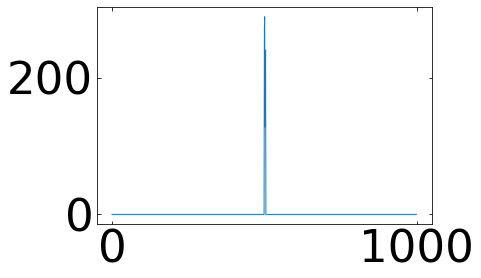

In [154]:
PSFimg

array([[[[201., 199., 200., ..., 201., 200., 201.],
         [201., 199., 200., ..., 201., 200., 201.],
         [201., 199., 200., ..., 201., 200., 201.],
         ...,
         [201., 199., 200., ..., 201., 200., 201.],
         [201., 199., 200., ..., 201., 200., 201.],
         [201., 199., 200., ..., 201., 200., 201.]],

        [[201., 200., 201., ..., 201., 201., 201.],
         [201., 200., 201., ..., 201., 201., 201.],
         [201., 200., 201., ..., 201., 201., 201.],
         ...,
         [201., 200., 201., ..., 201., 201., 201.],
         [201., 200., 201., ..., 201., 201., 201.],
         [201., 200., 201., ..., 201., 201., 201.]],

        [[200., 198., 199., ..., 200., 200., 200.],
         [200., 198., 199., ..., 200., 200., 200.],
         [200., 198., 199., ..., 200., 200., 200.],
         ...,
         [200., 198., 199., ..., 200., 200., 200.],
         [200., 198., 199., ..., 200., 200., 200.],
         [200., 198., 199., ..., 200., 200., 200.]],

        ...,

  